<a href="https://colab.research.google.com/github/enamouring/Stats-Eng/blob/main/Audrey_24_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo

In [1]:
#monte carlo, don't know how long it will take to run your program

In [2]:
import numpy as np
import matplotlib.pyplot as plt #adding imports since they were not included

In [3]:
x = np.linspace(-3,3,100)

In [4]:
y = x**2 + 2 #function

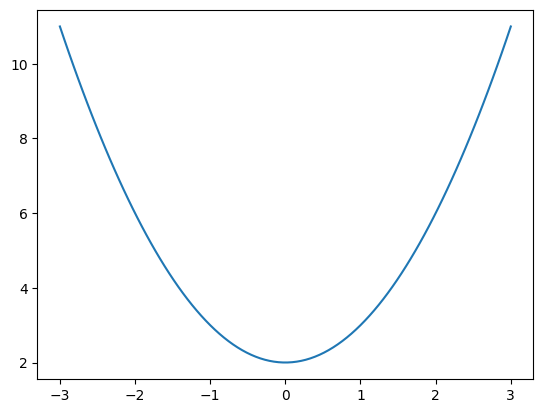

In [5]:
plt.plot(x,y)

In [6]:
#formula for computing an integral from 1 to 2 under the curve f(x)=x^2+2

$f(x) = x^2 + 2$

$Area = \int_a^bf(x) dx$

$= \int_a^b (x^2+2) dx$

$= \left.\frac{x^3}{3}+2x\right\vert_1^2$

$= (\frac{8}{3}+4) - (\frac{1}{3}+2)$

$= \frac{13}{3}$

In [7]:
13/3 #this is done by probability, what is the probability that when one throws a dart they hit it in the area underneath the curve (sampling numbers)

4.333333333333333

To integrate the function $f(x)$ over the interval $[a,b]$ we

[1] find some value $M$ such that $f(x) < M$ over the interval $[a,b]$

[2] select a random number $x$ from a uniform distribution over the interval $[a,b]$

[3] select a random number y from a uniform distribution over the interval $[0,M]$

[4] determine if $y > f(x)$ or $y ≤ f(x)$

[5] repeat this process $N$ times, keeping track of the number of times $y ≤ f(x)$ or under the curve, successes $S$.

The estimated probability of success is then:

$\frac{S}{N}=\frac{\text{Area under curve}}{\text{Total area inside rectangle}} = \frac{\int_a^bf(x)dx}{M(b-a)}$

$\int_a^bf(x)dx = M(b-a)\frac{S}{N}$

In [8]:
def f(x): #our function to integrate
    y = x**2 + 2
    return y

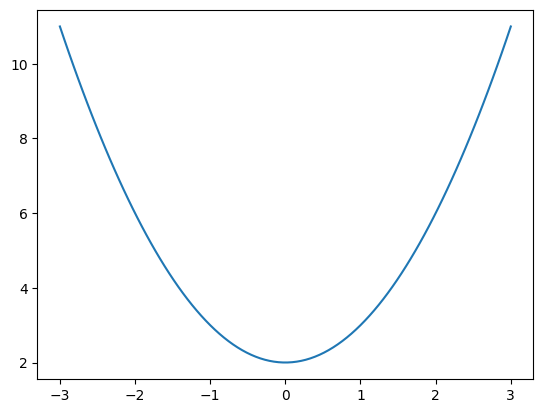

In [9]:
plt.plot(x,f(x))

In [10]:
M = 10 #10 is bigger than the function (MAX) over 1 to 2

In [11]:
a = 1 #checking the interval from 1 to 2
b = 2

In [12]:
x = a + (b-a)*np.random.random() #numbers that are never bigger than 1 or less than 0, needs adjustment so it gives from 1 to 2 (scale and shift to get numbers between 1 and 2)

In [13]:
x #recalling to check

1.382885130088257

In [14]:
y = M*np.random.random() #check random number up to the range M, substitute for y

In [15]:
x,y,f(x) #random (x,y) gets plugged into the function

(1.382885130088257, 9.055415278928166, 3.9123712830192154)

In [16]:
y < f(x) #check if y lands under the curve

False

In [17]:
N = 100_000 #checking for 100,000 iterates, how many points are under this curve
S = 0
for i in range(N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

M*(b-a)*(S/N) #M(b-a) (height times the width=area) multiplied times S/N gives the area under the curve

4.3687

In [18]:
def f(x):
    y = x**2 + 2
    return y

In [19]:
def monte_carlo_integrate(f,a,b,N):

    N = 10000000 #alter this to make the code more accurate
    S = 0 #counter of points beneath the curve
    for i in range(N):

        x = a + (b-a)*np.random.random() #randomized x-value from a to b
        y = M*np.random.random() #y-value from 0 to M

        S += (y < f(x)) #check if the y value is less than the function f(x)

    return M*(b-a)*(S/N) #area under the curve

In [20]:
monte_carlo_integrate(f,1,2,1000) #recall function

4.33275

In [21]:
from sympy import * #other way to compute

In [22]:
x = Symbol('x') #x is just a symbol 'x'

In [23]:
x

x

In [24]:
integrate(x**2 + 2, (x,1,2)) #knows the rules of calculus, integrate f(x)=x^2+2 with respect to x from 1 to 2 (if y was in its place, would integrate with respect to y)

13/3

In [25]:
13/3

4.333333333333333

In [26]:
integrate(x**3 + 3, (x,1,2))

27/4

In [27]:
27/4

6.75

In [28]:
x = 0

In [29]:
def f(x): #new function
    y = x**3 + 3
    return y

In [30]:
monte_carlo_integrate(f,1,2,1000000) #new integration underneath f(x)=x^3+3

6.7090879999999995

In [31]:
N = 2000 #iterates
S = 0 #counter
Z = np.zeros(N,) #array for area (N zeros)
for i in range(1,N): #loop

    x = a + (b-a)*np.random.random() #random x value in the interval a to b
    y = M*np.random.random() #random y value between 0 and M

    S += (y < f(x)) #increment depending on whether under the curve

    Z[i] = M*(b-a)*(S/i) #estimated area-> array Z

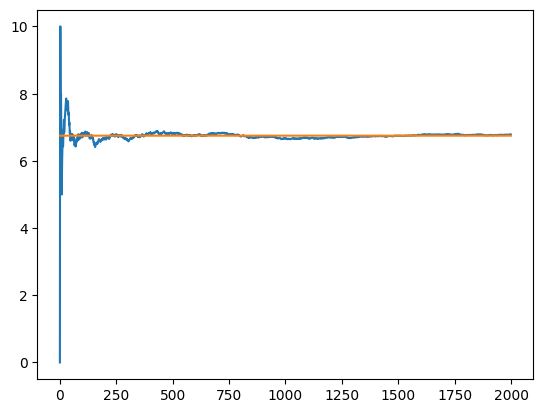

In [32]:
plt.plot(Z) #plot the estimated area
plt.plot(6.75*np.ones(Z.shape)) #actual area (6.75) compared to estimated area

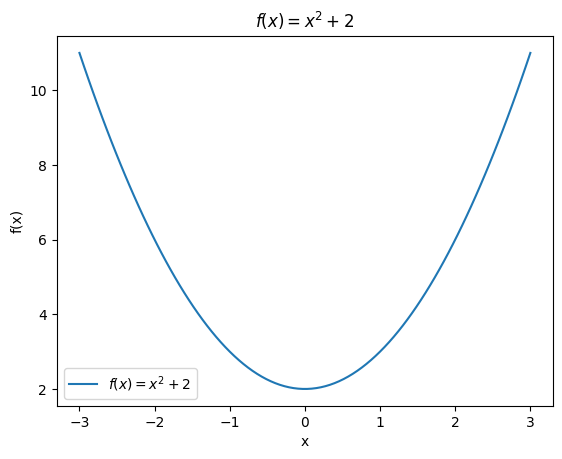

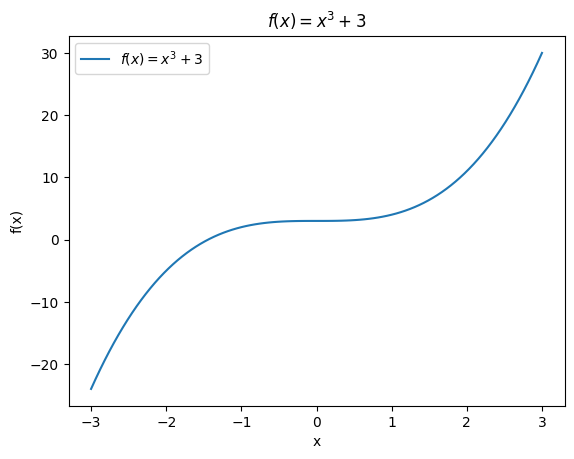

Exact Area under f1: 4.33333333333333
Estimated Area under f1: 4.3180000000000005
Exact Area under f2: 6.75000000000000
Estimated Area under f2: 6.74882


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate

# Define a general function for Monte Carlo integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0 #counter
    for _ in range(N): #loop N times
        x = a + (b - a) * np.random.random() #random x-value in interval a,b
        y = M * np.random.random() #random y-value in range
        if y < func(x): #check if y is under the curve
            S += 1 #increment counter if it is
    return M * (b - a) * (S / N) #estimated area

# Define the functions to be integrated
def f1(x):
    return x**2 + 2

def f2(x):
    return x**3 + 3

# Calculate exact and estimated areas
def calculate_areas(func, a, b, N, M):
    x_sym = Symbol('x')
    exact_area = integrate(func(x_sym), (x_sym, a, b)).evalf()
    estimated_area = monte_carlo_integrate(func, a, b, N, M)
    return exact_area, estimated_area #use monte carlo alg to determine est area

# Plotting function
def plot_function(func, title, a=-3, b=3):
    x = np.linspace(a, b, 100) #a to some value b (defined), 100 points inbetween
    y = func(x) #evaluate the function at each x value (to create the curve)
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# Plot the functions
plot_function(f1, "$f(x) = x^2 + 2$")
plot_function(f2, "$f(x) = x^3 + 3$")

# Calculate and print areas
exact_area_f1, estimated_area_f1 = calculate_areas(f1, 1, 2, 100000, 20)
exact_area_f2, estimated_area_f2 = calculate_areas(f2, 1, 2, 1000000, 20)

print("Exact Area under f1:", exact_area_f1)
print("Estimated Area under f1:", estimated_area_f1)
print("Exact Area under f2:", exact_area_f2)
print("Estimated Area under f2:", estimated_area_f2)


# Visualization

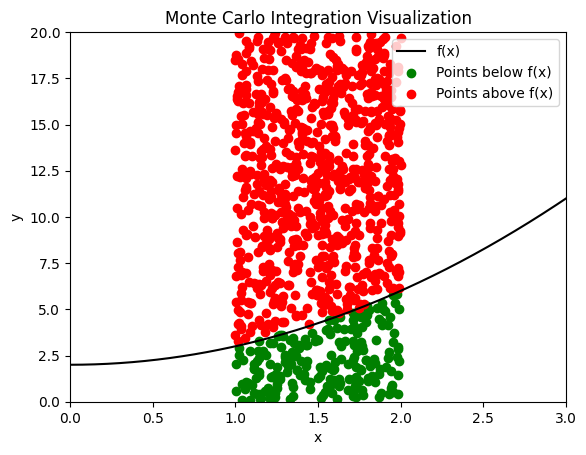

In [34]:
# Function to plot points for Monte Carlo integration
def plot_monte_carlo(func, a, b, M, N):
    x_points = a + (b - a) * np.random.random(N) #random x-value in interval a,b
    y_points = M * np.random.random(N) #random y-value in range 0,M
    below = y_points < func(x_points) #below the curve
    above = np.invert(below) #points above the curve

    # Plotting the function
    x = np.linspace(a - 1, b + 1, 400)
    y = func(x)
    plt.plot(x, y, label="f(x)", color='black')

    # Plotting the points
    plt.scatter(x_points[below], y_points[below], color='green', label='Points below f(x)') #scatter points, below with below (x,y) and label
    plt.scatter(x_points[above], y_points[above], color='red', label='Points above f(x)') #scatter points, above with above (x,y) and label

    # Setting up the plot limits and labels
    plt.xlim(a - 1, b + 1) #x limits
    plt.ylim(0, M) #y limits
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Monte Carlo Integration Visualization")
    plt.legend() #graph legend

    plt.show()

# Function to be integrated
def f(x): #designated curve
    return x**2 + 2

# Parameters for Monte Carlo Integration
a, b, M, N = 1, 2, 20, 1000 #a to b, max y-value (M) with n points correspondingly

# Plotting the Monte Carlo Integration
plot_monte_carlo(f, a, b, M, N)

In [35]:
#visualization of the random dot generator, whether they lie above or beneath the curve

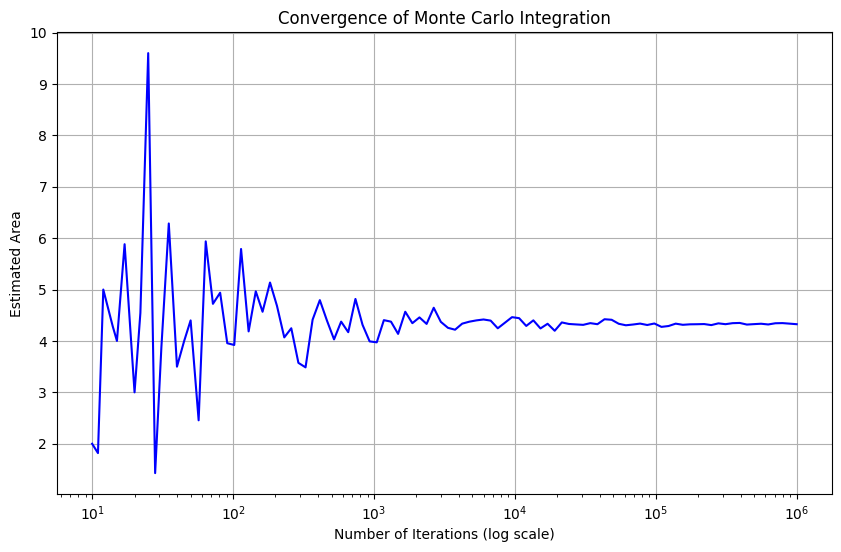

In [36]:
# Function for Monte Carlo Integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N) #same monte carlo function

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters
a, b, M = 1, 2, 20 #a and b bounds, M max y-value
iterations = np.logspace(1, 6, 100, dtype=int)  # Using logarithmically spaced iterations for smoother curve
estimated_areas = [] #empty list that will be storing estimated areas

# Calculate estimated areas for different numbers of iterations
for N in iterations: #loop
    estimated_area = monte_carlo_integrate(f, a, b, N, M)
    estimated_areas.append(estimated_area) #add to empty list

# Plotting convergence
plt.figure(figsize=(10, 6))
plt.plot(iterations, estimated_areas, color='blue')
plt.xscale('log') #visualization aspect
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Area')
plt.title('Convergence of Monte Carlo Integration')
plt.grid(True)
plt.show()